In [1]:
#import needed libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from pycaret.regression import *

## Load Cluster Data
Use same code for 1, 3, and 5 year return values

In [2]:
#load file with investment return (change for 1,3, 5 years)

#use for 1 year
df_1year = pd.read_csv('data_1year.csv', index_col=0)

#use for 3 year
#df_1year = pd.read_csv('data_3year.csv', index_col=0)

#use for 5 year
#df_1year = pd.read_csv('data_5year.csv', index_col=0)

df_1year = df_1year.rename(columns={'cluster':'Cluster'})

#load respective features

#use for 1 year
df_data_1year = pd.read_excel('data_1year_features.xlsx', index_col=0)

#use for 3 year
#df_data_1year = pd.read_excel('data_3year_features.xlsx', index_col=0)

#use for 5 year
#df_data_1year = pd.read_excel('data_5year_features.xlsx', index_col=0)

df_data_1year = df_data_1year.drop(['Lat', 'Lon'], axis=1)

#merge datasets
df = pd.merge(df_1year, df_data_1year, on=['Cluster', 'Type', 'Year'])

#drop columns not needed for predictions
df = df.drop(['Cluster', 'Lat', 'Lon', 'Year'], axis=1)

In [3]:
#show first rows
df.head()

,1y_ret,Type,Parks,Number of Primary Schools,Primary School AVG Rating,Number of Secondary Schools,Secondary School AVG Rating,Number of Post 16 Schools,Post 16 School AVG Rating,Services,Number of crimes: Vehicle crime,Number of crimes: Anti-social behaviour,Number of crimes: Violent crime,Number of crimes: Other crime,Number of crimes: Burglary,Number of crimes: Robbery,Number of crimes: Other theft,Number of crimes: Criminal damage and arson,Number of crimes: Public disorder and weapons,Number of crimes: Drugs,Number of crimes: Shoplifting,Number of crimes: Crime Type N/A,Number of crimes: Bicycle theft,Number of crimes: Violence and sexual offences,Number of crimes: Public order,Number of crimes: Theft from the person,Number of crimes: Possession of weapons
0,0.215738,D,64,0,0.0,7,2.0,4,2.0,21,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.308454,D,64,0,0.0,7,2.0,4,2.0,21,18,31,7,21,16,2,13,0,0,1,0,0,0,0,0,0,0
2,-0.167827,D,64,0,0.0,7,2.0,4,2.0,21,19,26,2,9,17,1,17,9,0,4,2,41,0,0,0,0,0
3,-0.196870,D,64,0,0.0,7,2.0,4,2.0,21,25,24,1,1,16,0,13,9,0,2,0,0,3,3,0,0,0
4,0.033064,D,64,0,0.0,7,2.0,4,2.0,21,22,15,0,0,9,0,23,2,0,0,0,0,7,8,4,0,0


## Prepare Data for Models

In [4]:
#one hot encode home type
one_hot = pd.get_dummies(df['Type'])
df = df.drop('Type',axis = 1)
df = df.join(one_hot) 

In [5]:
#set X and y

#use for 1 year
X = df.drop(['1y_ret'], axis=1)
y = df['1y_ret']

#use for 3 year
#X = df.drop(['3y_ret'], axis=1)
#y = df['3y_ret']

#use for 5 year
#X = df.drop(['1y_ret'], axis=1)
#y = df['1y_ret']

In [6]:
#split the data (default test size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#confirm sizes
print(X_train.shape, X_test.shape)

(981, 29) (328, 29)


## XGBRegressor

In [8]:
#pip install xgboost

In [9]:
#create and fit model using XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train);

In [10]:
#create predictions
y_pred = model.predict(X_test)

In [11]:
#check MSE
mse_val = mean_squared_error(y_test, y_pred)
mse_val

0.06640777542936521

In [12]:
#cheack MAE
mae_val = mean_absolute_error(y_test, y_pred)
mae_val

0.18410768556236232

In [13]:
#explore feature importance
for col,score in zip(X_train.columns,model.feature_importances_):
    print(col,score)

Parks 0.021169163
Number of Primary Schools 0.036140002
Primary School AVG Rating 0.025164325
Number of Secondary Schools 0.029115528
Secondary School AVG Rating 0.041600086
Number of Post 16 Schools 0.05411936
Post 16 School AVG Rating 0.037671443
Services 0.050113045
Number of crimes: Vehicle crime 0.020195538
Number of crimes: Anti-social behaviour 0.035836905
Number of crimes: Violent crime 0.01787423
Number of crimes: Other crime 0.04086162
Number of crimes: Burglary 0.03926324
Number of crimes: Robbery 0.044475984
Number of crimes: Other theft 0.039199613
Number of crimes: Criminal damage and arson 0.03481901
Number of crimes: Public disorder and weapons 0.019429937
Number of crimes: Drugs 0.03480828
Number of crimes: Shoplifting 0.05193098
Number of crimes: Crime Type N/A 0.0074331923
Number of crimes: Bicycle theft 0.027528847
Number of crimes: Violence and sexual offences 0.03842528
Number of crimes: Public order 0.0405688
Number of crimes: Theft from the person 0.074867524
Nu

## Dummy Regressor

In [14]:
#set up and predicte values using dummy regressor and means
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

In [15]:
#check MSE
mse_val = mean_squared_error(y_test, y_pred)
mse_val

0.043469249038032266

In [16]:
#check MAE
mae_val = mean_absolute_error(y_test, y_pred)
mae_val

0.13903655834582032

## MLPRegressor

In [17]:
#set up MLP regression model, fit data, and predict values
mlp_reg = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred  = mlp_reg.predict(X_test)

In [18]:
#check MSE values
mse_val = mean_squared_error(y_test, y_pred)
mse_val

0.3494416619804725

In [19]:
#check MAE values
mae_val = mean_absolute_error(y_test, y_pred)
mae_val

0.4359080787859369

## PyCaret

In [20]:
#pip install pycaret

In [21]:
#review columns
df.columns

Index(['1y_ret', 'Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Services',
       'Number of crimes: Vehicle crime',
       'Number of crimes: Anti-social behaviour',
       'Number of crimes: Violent crime', 'Number of crimes: Other crime',
       'Number of crimes: Burglary', 'Number of crimes: Robbery',
       'Number of crimes: Other theft',
       'Number of crimes: Criminal damage and arson',
       'Number of crimes: Public disorder and weapons',
       'Number of crimes: Drugs', 'Number of crimes: Shoplifting',
       'Number of crimes: Crime Type N/A', 'Number of crimes: Bicycle theft',
       'Number of crimes: Violence and sexual offences',
       'Number of crimes: Public order',
       'Number of crimes: Theft from the person',
       'Number of crimes: Possession of weapons', 'D', 'F', 'S', 'T'],
      dtype='obj

In [22]:
#set up pycaret, set values to be numeric
num_feats = ['Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Services',
       'Number of crimes: Vehicle crime',
       'Number of crimes: Anti-social behaviour',
       'Number of crimes: Violent crime', 'Number of crimes: Other crime',
       'Number of crimes: Burglary', 'Number of crimes: Robbery',
       'Number of crimes: Other theft',
       'Number of crimes: Criminal damage and arson',
       'Number of crimes: Public disorder and weapons',
       'Number of crimes: Drugs', 'Number of crimes: Shoplifting',
       'Number of crimes: Crime Type N/A', 'Number of crimes: Bicycle theft',
       'Number of crimes: Violence and sexual offences',
       'Number of crimes: Public order',
       'Number of crimes: Theft from the person',
       'Number of crimes: Possession of weapons', 'D', 'F', 'S', 'T']
reg = setup(data = df, target = '1y_ret', session_id=123, numeric_features=num_feats) 

,Description,Value
0,session_id,123
1,Target,1y_ret
2,Original Data,"(1309, 30)"
3,Missing Values,False
4,Numeric Features,29
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(916, 29)"


In [23]:
#compare models using pycaret
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1359,0.0370,0.1902,-0.0142,0.1445,1.8094,0.0170
llar,Lasso Least Angle Regression,0.1359,0.0370,0.1902,-0.0142,0.1445,1.8094,0.0150
dummy,Dummy Regressor,0.1359,0.0370,0.1902,-0.0142,0.1445,1.8094,0.0120
en,Elastic Net,0.1359,0.0370,0.1902,-0.0148,0.1444,1.8032,0.0170
omp,Orthogonal Matching Pursuit,0.1366,0.0373,0.1909,-0.0218,0.1436,1.6799,0.0160
br,Bayesian Ridge,0.1367,0.0373,0.1910,-0.0234,0.1441,1.8369,0.0160
ridge,Ridge Regression,0.1388,0.0380,0.1926,-0.0399,0.1390,2.2648,0.0140
lr,Linear Regression,0.1389,0.0380,0.1927,-0.0412,0.1389,2.2821,0.4260
lar,Least Angle Regression,0.1389,0.0380,0.1927,-0.0414,0.1382,2.2433,0.0200
huber,Huber Regressor,0.1433,0.0397,0.1971,-0.0926,0.1334,3.0196,0.0420


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
#create and tune lasso model using pycaret
mod = create_model('lasso')
tuned_mod = tune_model(mod)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1322,0.0395,0.1988,-0.0014,0.1474,4.1762
1,0.1558,0.0475,0.2180,-0.0000,0.1656,3.3304
2,0.1158,0.0283,0.1682,-0.0000,0.1271,1.4631
3,0.1486,0.0397,0.1992,-0.0206,0.1499,1.0975
4,0.1288,0.0264,0.1625,-0.0077,0.1248,1.2118
5,0.1320,0.0311,0.1764,-0.0022,0.1386,1.5154
6,0.1665,0.0684,0.2616,-0.0681,0.1925,1.2433
7,0.1286,0.0313,0.1770,-0.0029,0.1391,1.3959
8,0.1266,0.0275,0.1657,-0.0000,0.1307,1.4939


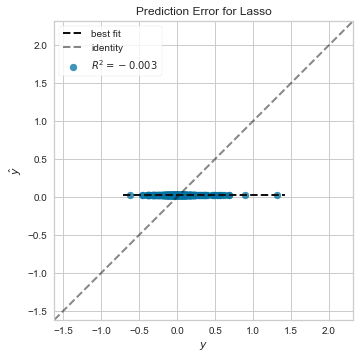

In [25]:
#plot model error using pycaret
plot_model(tuned_mod, plot = 'error')